## Artificial Neural Network

# <img src="https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Feed-Forward-Neural-Network.gif">

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [2]:
tf.__version__

'2.16.1'

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [5]:
X.shape, y.shape

((10000, 10), (10000,))

In [6]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [7]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

* Label Encoding the **Gender** column

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [9]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [10]:
X[1]

array([608, 'Spain', 0, 41, 1, 83807.86, 1, 0, 1, 112542.58], dtype=object)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [12]:
X.shape

(10000, 12)

In [13]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [14]:
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X_train.shape, X_test.shape

((8000, 12), (2000, 12))

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* <font color = "red">Initializing the ANN</font>

In [18]:
ann = tf.keras.models.Sequential()

* <font color = "red">Adding the input layer and the first hidden layer</font>

In [19]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

* <font color = "red">Adding the second hidden layer</font>

In [20]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

* <font color = "red">Adding the output layer</font>

In [21]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [22]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - accuracy: 0.5598 - loss: 0.7199
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.7966 - loss: 0.4936
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.8027 - loss: 0.4422
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.8155 - loss: 0.4198
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.8122 - loss: 0.4197
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.8195 - loss: 0.3992
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.8188 - loss: 0.4040
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.8212 - loss: 0.3875
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.8288 - loss: 0.3828
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8329 - loss: 0.3833


* <font color = "red">Solution</font>

In [24]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[False]]


In [25]:
y_pred_test = ann.predict(X_test)
y_pred_test

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step


array([[0.182216  ],
       [0.40116787],
       [0.13228601],
       ...,
       [0.12776397],
       [0.17076991],
       [0.25630227]], dtype=float32)

In [26]:
y_pred_test = (y_pred_test > 0.5)
y_pred_test

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [27]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
print(np.concatenate((y_pred_test.reshape(len(y_pred_test),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [29]:
y_pred_train = ann.predict(X_train)
y_pred_train = (y_pred_train > 0.5)
print(np.concatenate((y_pred_train.reshape(len(y_pred_train),1), y_train.reshape(len(y_train),1)),1))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


[[1504   91]
 [ 220  185]]


<Axes: >

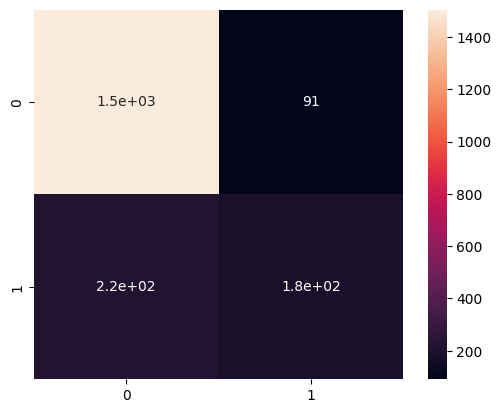

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
sns.heatmap(cm_test, square=True , annot=True)

[[6071  297]
 [ 954  678]]


<Axes: >

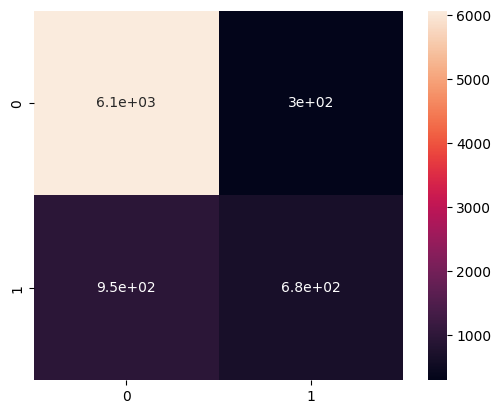

In [31]:
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
sns.heatmap(cm_train, square=True , annot=True)

In [32]:
from sklearn.metrics import precision_score, accuracy_score, recall_score
print('Accuracy_train: ' ,accuracy_score(y_train, y_pred_train))
print('Accuracy_test: ' ,accuracy_score(y_test, y_pred_test))

Accuracy_train:  0.843625
Accuracy_test:  0.8445


In [33]:
print('Precision_train: ' ,precision_score(y_train, y_pred_train,average='macro'))
print('Precision_test: ' ,precision_score(y_test, y_pred_test,average='macro'))

print('Recall_train: ' ,recall_score(y_train, y_pred_train,average='macro'))
print('Recall_test: ' ,recall_score(y_test, y_pred_test,average='macro'))

Precision_train:  0.7797919518204215
Precision_test:  0.7713398231278792
Recall_train:  0.6844008646172037
Recall_test:  0.69986841596037


| | Accuracy  | Precision    | Recall   | 
|---:|:-------------|:-----------|:------|
| train | 0.8646  | 0.8161       | 0.7310   |
| test | 0.856  | 0.7882    | 0.7319   |


## <p style="padding:10px;background-color:#324459;margin:0;color:#eab578;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Building the ANN(batch size = 16)</p>

In [34]:
ann_16 = tf.keras.models.Sequential()
ann_16.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann_16.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann_16.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann_16.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann_16.fit(X_train, y_train, batch_size = 16, epochs = 10)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 713us/step - accuracy: 0.7635 - loss: 0.5392
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.7984 - loss: 0.4569
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.8096 - loss: 0.4295
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.8210 - loss: 0.4225
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8249 - loss: 0.4101
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.8326 - loss: 0.4018
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8359 - loss: 0.3901
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.8247 - loss: 0.3965
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.8328 - loss: 0.3875
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.8396 - loss: 0.3737


In [35]:
ay_pred_test = ann_16.predict(X_test)
y_pred_test = (y_pred_test > 0.5)
print(np.concatenate((y_pred_test.reshape(len(y_pred_test),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [36]:
y_pred_train = ann_16.predict(X_train)
y_pred_train = (y_pred_train > 0.5)
print(np.concatenate((y_pred_train.reshape(len(y_pred_train),1), y_train.reshape(len(y_train),1)),1))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


[[1504   91]
 [ 220  185]]


<Axes: >

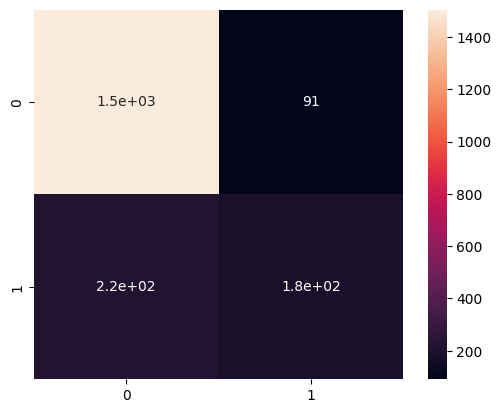

In [37]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
sns.heatmap(cm_test, square=True , annot=True)

[[6111  257]
 [1032  600]]


<Axes: >

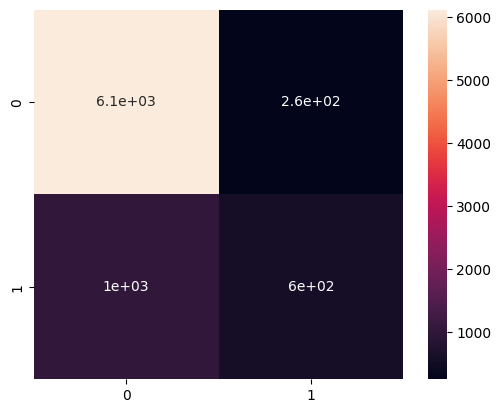

In [38]:
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
sns.heatmap(cm_train, square=True , annot=True)

In [39]:
print('Accuracy_train: ' ,accuracy_score(y_train, y_pred_train))
print('Accuracy_test: ' ,accuracy_score(y_test, y_pred_test))

print('Precision_train: ' ,precision_score(y_train, y_pred_train,average='macro'))
print('Precision_test: ' ,precision_score(y_test, y_pred_test,average='macro'))

print('Recall_train: ' ,recall_score(y_train, y_pred_train,average='macro'))
print('Recall_test: ' ,recall_score(y_test, y_pred_test,average='macro'))

Accuracy_train:  0.838875
Accuracy_test:  0.8445
Precision_train:  0.7778197878282808
Precision_test:  0.7713398231278792
Recall_train:  0.6636445093112622
Recall_test:  0.69986841596037


In [40]:
# Create the ANN model
ann_16 = tf.keras.models.Sequential()

# Add the first dense layer with ReLU activation and dropout
ann_16.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann_16.add(tf.keras.layers.Dropout(0.2))  # Dropout with 20% dropout rate

# Add the second dense layer with ReLU activation and dropout
ann_16.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann_16.add(tf.keras.layers.Dropout(0.2))  # Dropout with 20% dropout rate

# Add the output layer with sigmoid activation
ann_16.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
ann_16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_16.fit(X_train, y_train, batch_size=16, epochs=10)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.7915 - loss: 0.5876
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.7926 - loss: 0.4972
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.7928 - loss: 0.4712
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.7943 - loss: 0.4625
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.7847 - loss: 0.4744
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.7969 - loss: 0.4465
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.7991 - loss: 0.4420
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.8003 - loss: 0.4422
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.7911 - loss: 0.4547
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.7898 - loss: 0.4555


In [41]:
ay_pred_test = ann_16.predict(X_test)
y_pred_test = (y_pred_test > 0.5)
print(np.concatenate((y_pred_test.reshape(len(y_pred_test),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [42]:
y_pred_train = ann_16.predict(X_train)
y_pred_train = (y_pred_train > 0.5)
print(np.concatenate((y_pred_train.reshape(len(y_pred_train),1), y_train.reshape(len(y_train),1)),1))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


[[1504   91]
 [ 220  185]]


<Axes: >

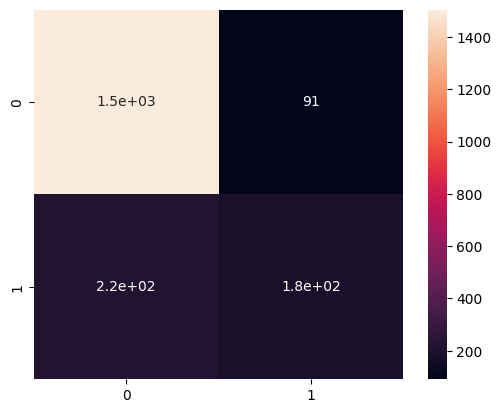

In [43]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
sns.heatmap(cm_test, square=True , annot=True)

[[6352   16]
 [1573   59]]


<Axes: >

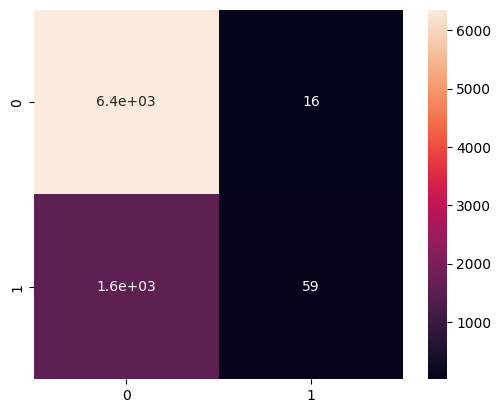

In [44]:
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
sns.heatmap(cm_train, square=True , annot=True)

In [45]:
print('Accuracy_train: ' ,accuracy_score(y_train, y_pred_train))
print('Accuracy_test: ' ,accuracy_score(y_test, y_pred_test))

print('Precision_train: ' ,precision_score(y_train, y_pred_train,average='macro'))
print('Precision_test: ' ,precision_score(y_test, y_pred_test,average='macro'))

print('Recall_train: ' ,recall_score(y_train, y_pred_train,average='macro'))
print('Recall_test: ' ,recall_score(y_test, y_pred_test,average='macro'))

Accuracy_train:  0.801375
Accuracy_test:  0.8445
Precision_train:  0.7940904311251314
Precision_test:  0.7713398231278792
Recall_train:  0.5168196989851217
Recall_test:  0.69986841596037
